# **Imbalanced Data Bank**

## 1. Muat dan Pra-pemrosesan Data

Tahap pertama adalah memuat dataset `bank`. Dataset ini berisi fitur-fitur nasabah bank dan variabel target 'y' yang menunjukkan apakah nasabah tersebut berlangganan deposito berjangka atau tidak ('yes'/'no').

Karena model machine learning memerlukan input numerik, kita akan melakukan beberapa langkah pra-pemrosesan:
1.  **Encoding Variabel Target:** Mengubah 'y' ('no'/'yes') menjadi 0/1.
2.  **One-Hot Encoding:** Mengubah fitur-fitur kategorikal (seperti 'job', 'marital', 'education') menjadi kolom-kolom numerik.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

# Muat data
df = pd.read_csv('bank.csv', sep=';')

# Pisahkan fitur (X) dan target (y)
X = df.drop('y', axis=1)
y_labels = df['y']

# Encoding variabel target
le = LabelEncoder()
y = le.fit_transform(y_labels)

# One-Hot Encoding untuk fitur kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of feature matrix after encoding:", X_scaled.shape)


Shape of feature matrix after encoding: (4521, 42)


## 2. Analisis Distribusi Kelas Awal

Kita akan memeriksa distribusi kelas pada variabel target. Dataset ini secara alami tidak seimbang, di mana jumlah nasabah yang tidak berlangganan (kelas 0) jauh lebih banyak daripada yang berlangganan (kelas 1).

Distribusi Kelas Awal:
0    4000
1     521
Name: count, dtype: int64


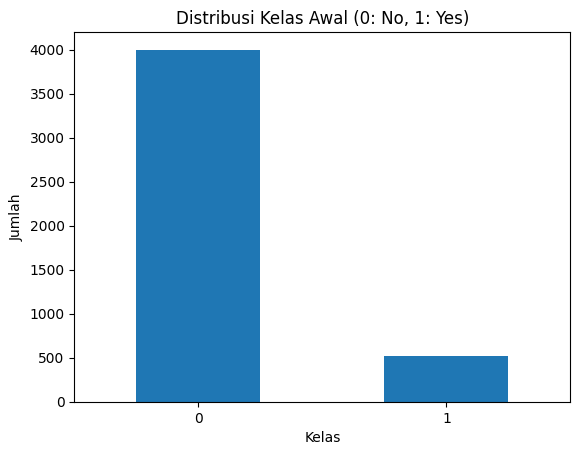

In [2]:
print("Distribusi Kelas Awal:")
class_distribution = pd.Series(y).value_counts()
print(class_distribution)

class_distribution.plot(kind='bar')
plt.title('Distribusi Kelas Awal (0: No, 1: Yes)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

## 3. Klasifikasi pada Data Tidak Seimbang (Original)

Pertama, kita akan melatih dan mengevaluasi model pada data asli yang tidak seimbang. Untuk tujuan visualisasi, kita akan mereduksi dimensi fitur menjadi 2 komponen utama menggunakan PCA. Model akan dilatih dan dievaluasi pada data hasil PCA ini.

Model yang digunakan:
- SVM Tunggal
- Decision Tree Tunggal
- Bagging dengan SVM
- Bagging dengan Decision Tree

--- Hasil SVM pada Data Tidak Seimbang ---
Akurasi: 0.8850405305821666

Classification Report:
               precision    recall  f1-score   support

          no       0.89      1.00      0.94      1201
         yes       0.00      0.00      0.00       156

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.89      0.83      1357



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


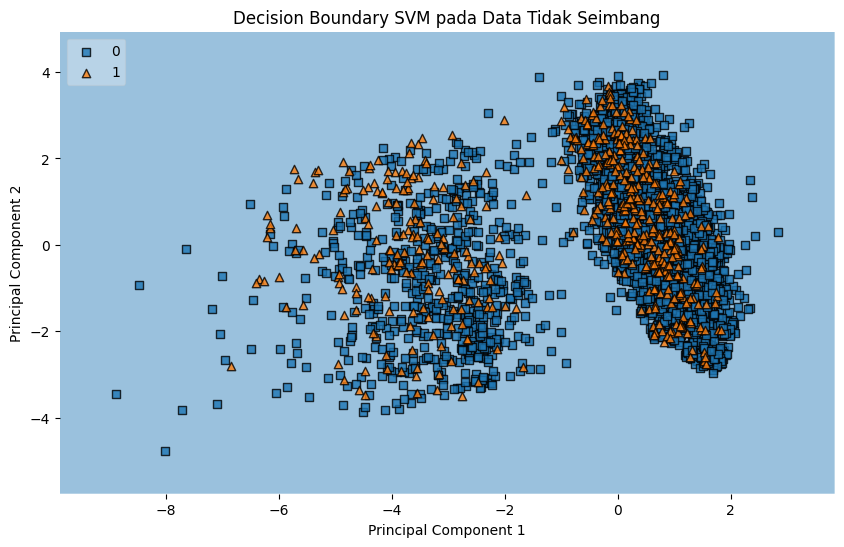



--- Hasil Decision Tree pada Data Tidak Seimbang ---
Akurasi: 0.8039793662490788

Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.89      0.89      1201
         yes       0.16      0.17      0.17       156

    accuracy                           0.80      1357
   macro avg       0.53      0.53      0.53      1357
weighted avg       0.81      0.80      0.81      1357



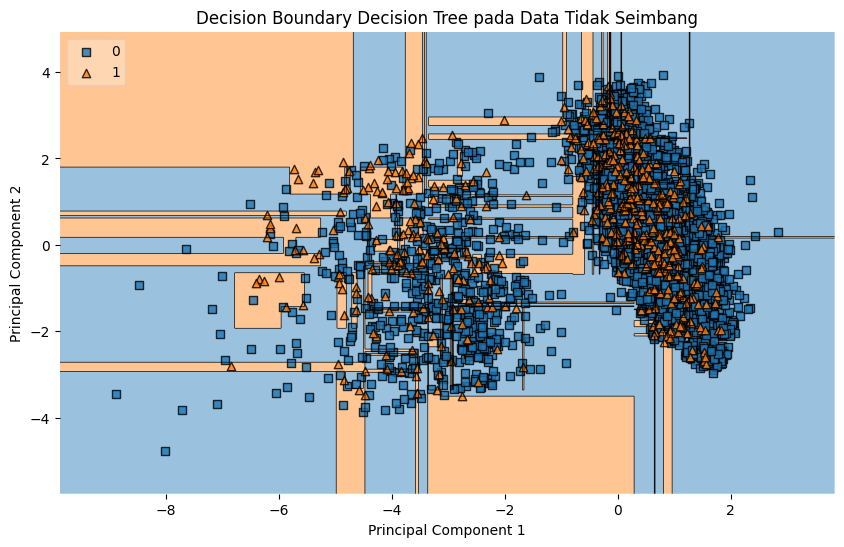



--- Hasil Bagging SVM pada Data Tidak Seimbang ---
Akurasi: 0.8850405305821666

Classification Report:
               precision    recall  f1-score   support

          no       0.89      1.00      0.94      1201
         yes       0.00      0.00      0.00       156

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.89      0.83      1357



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


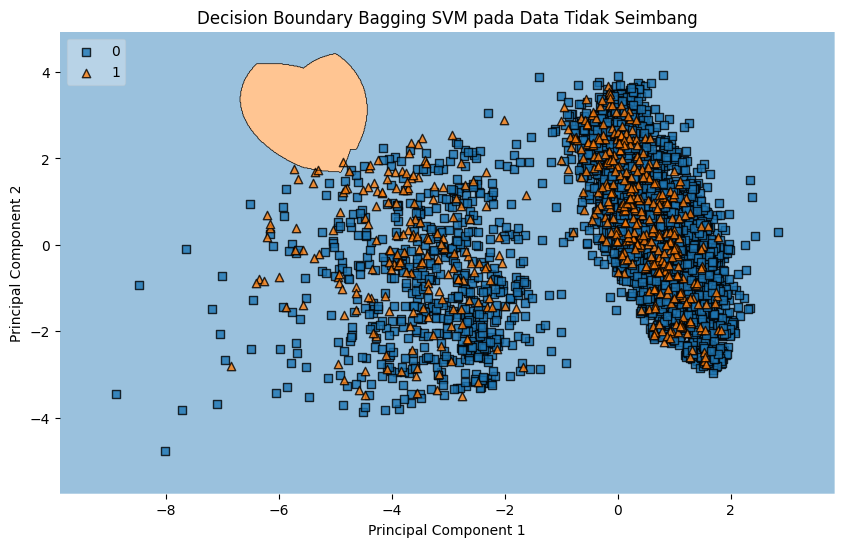



--- Hasil Bagging DT pada Data Tidak Seimbang ---
Akurasi: 0.8585114222549742

Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.95      0.92      1201
         yes       0.26      0.13      0.17       156

    accuracy                           0.86      1357
   macro avg       0.58      0.54      0.55      1357
weighted avg       0.82      0.86      0.84      1357



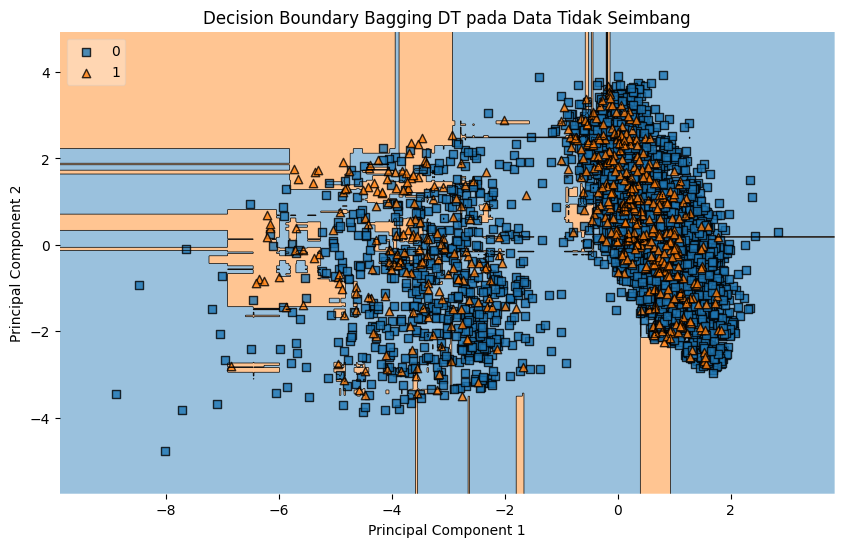

In [3]:
# PCA untuk reduksi dimensi menjadi 2 untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data hasil PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Inisialisasi Model
models = {
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging SVM": BaggingClassifier(estimator=SVC(random_state=42), n_estimators=10, random_state=42),
    "Bagging DT": BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
}

for name, model in models.items():
    print(f"--- Hasil {name} pada Data Tidak Seimbang ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_pca, y, clf=model, legend=2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Decision Boundary {name} pada Data Tidak Seimbang')
    plt.show()
    print("\n" + "="*60 + "\n")

## 4. Menyeimbangkan Data dengan SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) akan digunakan untuk membuat sampel sintetis dari kelas minoritas. Ini akan menyeimbangkan distribusi kelas sehingga model tidak bias terhadap kelas mayoritas.

In [4]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

print("Distribusi Kelas Setelah SMOTE:")
print(pd.Series(y_smote).value_counts())

Distribusi Kelas Setelah SMOTE:
0    4000
1    4000
Name: count, dtype: int64


## 5. Klasifikasi pada Data Seimbang (SMOTE)

Sekarang, kita melatih dan mengevaluasi model yang sama pada data yang telah diseimbangkan oleh SMOTE. Kita harapkan ada peningkatan pada metrik `recall` untuk kelas 'yes'.

--- Hasil SVM pada Data Seimbang (SMOTE) ---
Akurasi: 0.6316666666666667

Classification Report:
               precision    recall  f1-score   support

          no       0.60      0.76      0.67      1200
         yes       0.68      0.50      0.58      1200

    accuracy                           0.63      2400
   macro avg       0.64      0.63      0.63      2400
weighted avg       0.64      0.63      0.63      2400



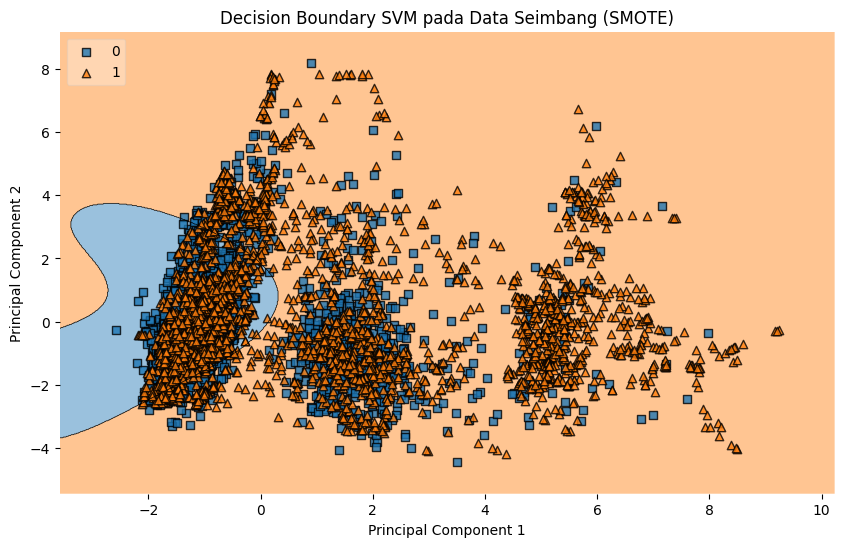



--- Hasil Decision Tree pada Data Seimbang (SMOTE) ---
Akurasi: 0.6275

Classification Report:
               precision    recall  f1-score   support

          no       0.63      0.61      0.62      1200
         yes       0.62      0.64      0.63      1200

    accuracy                           0.63      2400
   macro avg       0.63      0.63      0.63      2400
weighted avg       0.63      0.63      0.63      2400



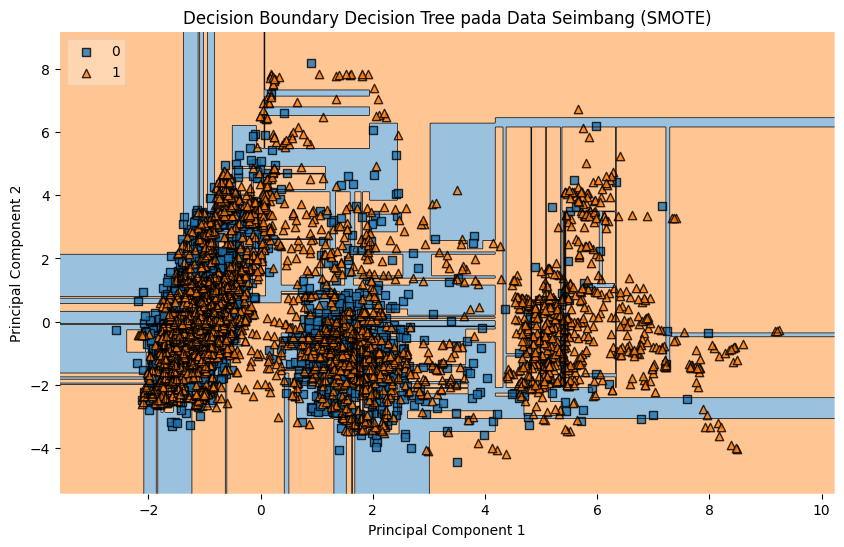



--- Hasil Bagging SVM pada Data Seimbang (SMOTE) ---
Akurasi: 0.63

Classification Report:
               precision    recall  f1-score   support

          no       0.60      0.77      0.67      1200
         yes       0.68      0.49      0.57      1200

    accuracy                           0.63      2400
   macro avg       0.64      0.63      0.62      2400
weighted avg       0.64      0.63      0.62      2400



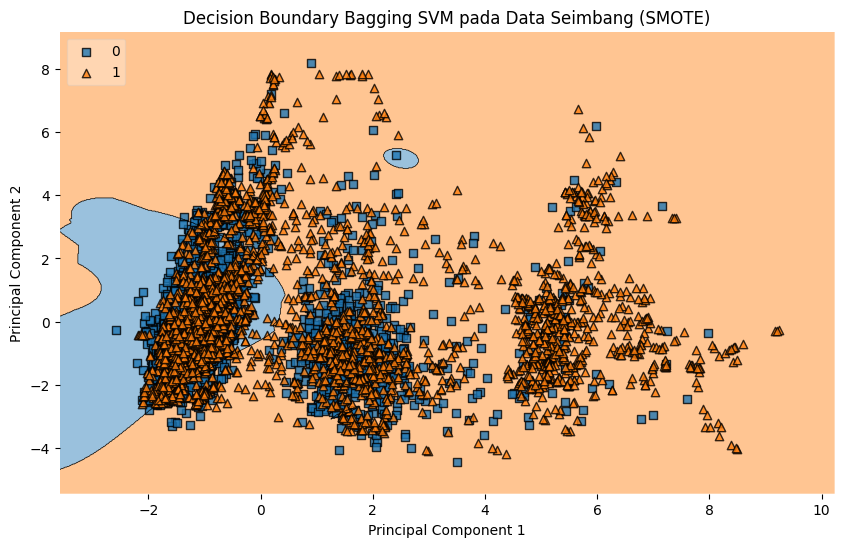



--- Hasil Bagging DT pada Data Seimbang (SMOTE) ---
Akurasi: 0.6670833333333334

Classification Report:
               precision    recall  f1-score   support

          no       0.66      0.70      0.68      1200
         yes       0.68      0.63      0.65      1200

    accuracy                           0.67      2400
   macro avg       0.67      0.67      0.67      2400
weighted avg       0.67      0.67      0.67      2400



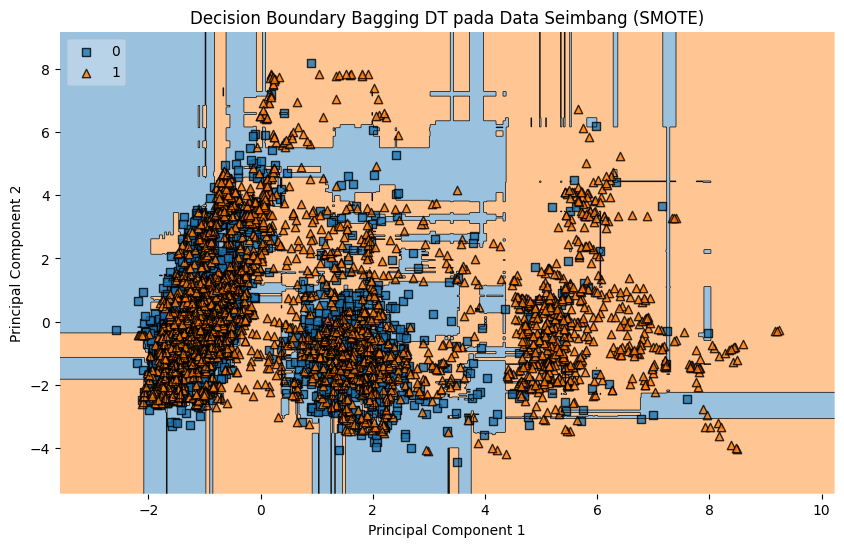

In [5]:
# PCA pada data SMOTE
pca_smote = PCA(n_components=2)
X_pca_smote = pca_smote.fit_transform(X_smote)

# Split data hasil PCA
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_pca_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote)

for name, model in models.items():
    print(f"--- Hasil {name} pada Data Seimbang (SMOTE) ---")
    model.fit(X_train_sm, y_train_sm)
    y_pred_sm = model.predict(X_test_sm)
    print(f"Akurasi: {accuracy_score(y_test_sm, y_pred_sm)}")
    print("\nClassification Report:\n", classification_report(y_test_sm, y_pred_sm, target_names=le.classes_))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_pca_smote, y_smote, clf=model, legend=2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Decision Boundary {name} pada Data Seimbang (SMOTE)')
    plt.show()
    print("\n" + "="*60 + "\n")

## 6. Menyeimbangkan Data dengan ADASYN

ADASYN (Adaptive Synthetic Sampling) adalah alternatif dari SMOTE. ADASYN juga membuat sampel sintetis, tetapi lebih fokus pada sampel minoritas yang lebih sulit untuk dipelajari (yang berada di dekat batas keputusan). Ini bisa menghasilkan batas keputusan yang lebih baik.

In [6]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_scaled, y)

print("Distribusi Kelas Setelah ADASYN:")
print(pd.Series(y_adasyn).value_counts())

Distribusi Kelas Setelah ADASYN:
0    4000
1    3971
Name: count, dtype: int64


## 7. Klasifikasi pada Data Seimbang (ADASYN)

Terakhir, kita evaluasi model pada data yang diseimbangkan oleh ADASYN untuk membandingkan hasilnya dengan SMOTE dan data asli.

--- Hasil SVM pada Data Seimbang (ADASYN) ---
Akurasi: 0.6020066889632107

Classification Report:
               precision    recall  f1-score   support

          no       0.57      0.80      0.67      1200
         yes       0.66      0.41      0.51      1192

    accuracy                           0.60      2392
   macro avg       0.62      0.60      0.59      2392
weighted avg       0.62      0.60      0.59      2392



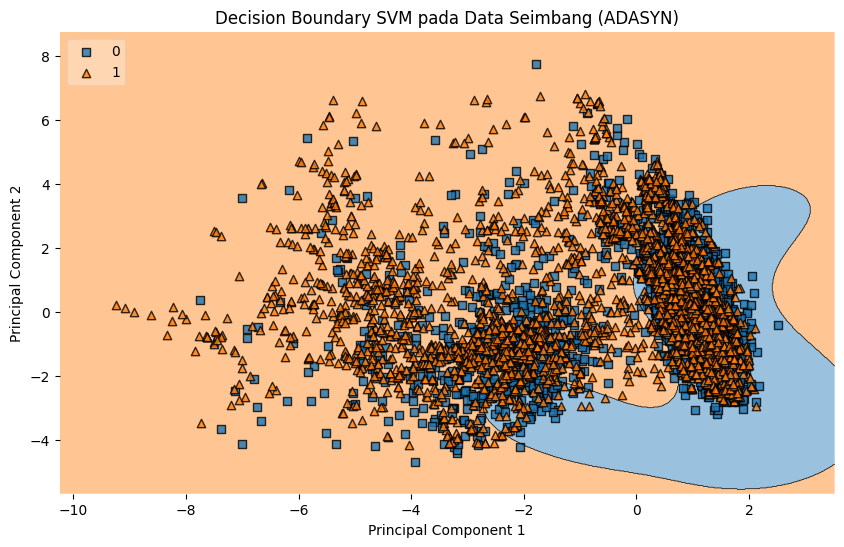



--- Hasil Decision Tree pada Data Seimbang (ADASYN) ---
Akurasi: 0.5999163879598662

Classification Report:
               precision    recall  f1-score   support

          no       0.60      0.59      0.60      1200
         yes       0.60      0.61      0.60      1192

    accuracy                           0.60      2392
   macro avg       0.60      0.60      0.60      2392
weighted avg       0.60      0.60      0.60      2392



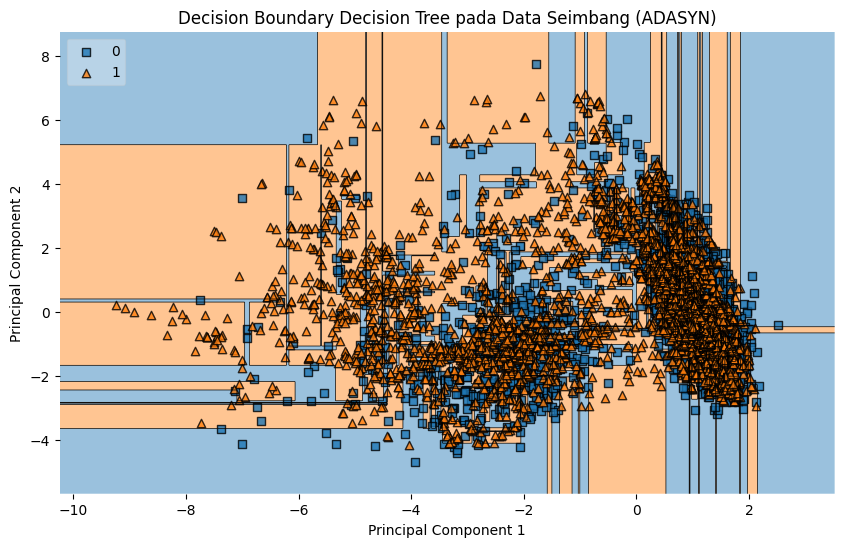



--- Hasil Bagging SVM pada Data Seimbang (ADASYN) ---
Akurasi: 0.6086956521739131

Classification Report:
               precision    recall  f1-score   support

          no       0.58      0.79      0.67      1200
         yes       0.67      0.43      0.52      1192

    accuracy                           0.61      2392
   macro avg       0.62      0.61      0.60      2392
weighted avg       0.62      0.61      0.60      2392



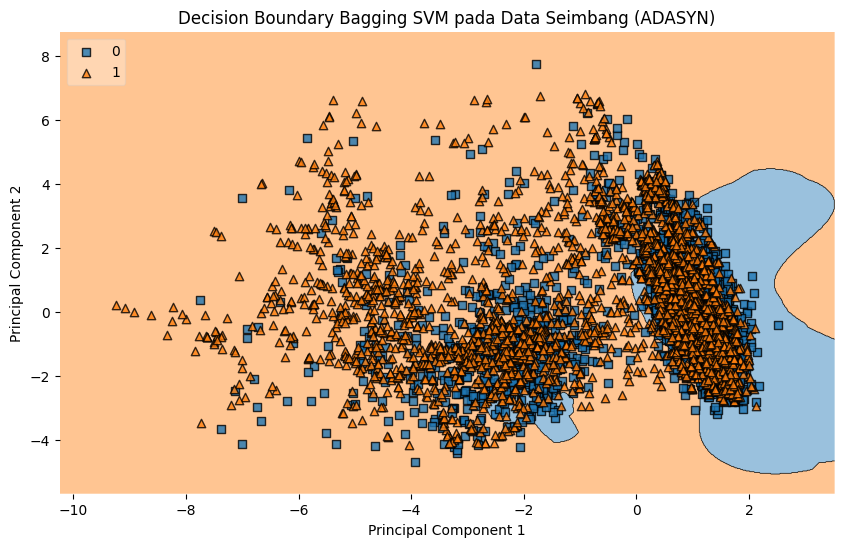



--- Hasil Bagging DT pada Data Seimbang (ADASYN) ---
Akurasi: 0.6417224080267558

Classification Report:
               precision    recall  f1-score   support

          no       0.63      0.69      0.66      1200
         yes       0.65      0.60      0.62      1192

    accuracy                           0.64      2392
   macro avg       0.64      0.64      0.64      2392
weighted avg       0.64      0.64      0.64      2392



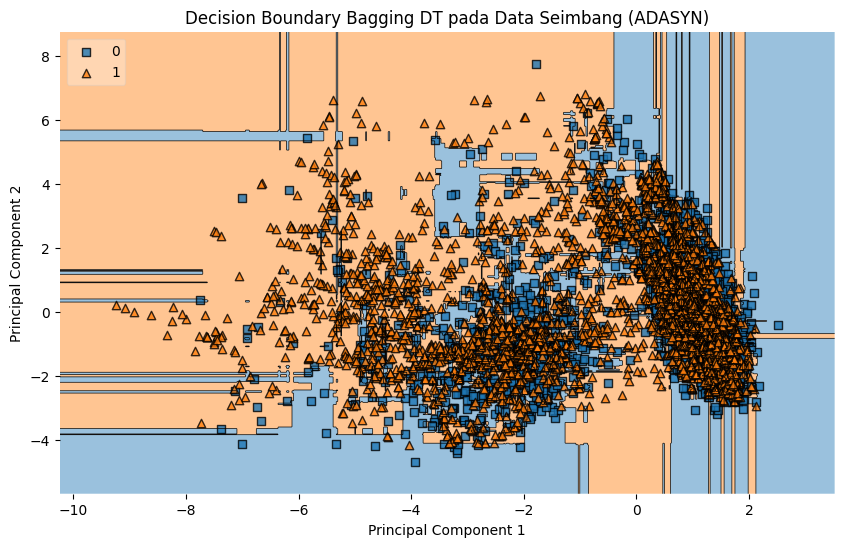

In [7]:
# PCA pada data ADASYN
pca_adasyn = PCA(n_components=2)
X_pca_adasyn = pca_adasyn.fit_transform(X_adasyn)

# Split data hasil PCA
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_pca_adasyn, y_adasyn, test_size=0.3, random_state=42, stratify=y_adasyn)

for name, model in models.items():
    print(f"--- Hasil {name} pada Data Seimbang (ADASYN) ---")
    model.fit(X_train_ad, y_train_ad)
    y_pred_ad = model.predict(X_test_ad)
    print(f"Akurasi: {accuracy_score(y_test_ad, y_pred_ad)}")
    print("\nClassification Report:\n", classification_report(y_test_ad, y_pred_ad, target_names=le.classes_))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_pca_adasyn, y_adasyn, clf=model, legend=2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Decision Boundary {name} pada Data Seimbang (ADASYN)')
    plt.show()
    print("\n" + "="*60 + "\n")

## 8. Kesimpulan dan Perbandingan

1.  **Data Tidak Seimbang:** Model yang dilatih pada data asli menunjukkan `recall` yang sangat rendah untuk kelas minoritas ('yes'). Artinya, model sangat kesulitan mengidentifikasi nasabah yang akan berlangganan. Akurasi yang tinggi di sini menipu karena model cenderung menebak kelas mayoritas.

2.  **Efek SMOTE & ADASYN:** Kedua teknik oversampling secara dramatis meningkatkan `recall` untuk kelas 'yes'. Ini berarti model menjadi jauh lebih baik dalam mengidentifikasi kasus positif. Meskipun akurasi keseluruhan mungkin sedikit lebih rendah dibandingkan pada data tidak seimbang, model yang dihasilkan jauh lebih berguna dan adil karena tidak lagi bias terhadap kelas mayoritas. Performa antara SMOTE dan ADASYN cenderung mirip dalam kasus ini.

3.  **Efek Bagging:** Menggunakan `BaggingClassifier` (baik dengan SVM maupun Decision Tree) pada data yang sudah diseimbangkan memberikan performa yang solid dan seringkali lebih stabil. Kombinasi `Bagging` dengan `Decision Tree` pada data yang telah di-oversampling (SMOTE/ADASYN) tampaknya memberikan keseimbangan yang baik antara `precision` dan `recall`.

**Kesimpulan Akhir:** Untuk masalah klasifikasi pada dataset `bank` yang tidak seimbang, menerapkan teknik oversampling seperti **SMOTE** atau **ADASYN** adalah langkah krusial. Menggabungkannya dengan metode ensemble seperti **Bagging** dapat lebih lanjut menstabilkan dan meningkatkan keandalan model.